<a href="https://colab.research.google.com/github/AlessiaLeoFolliero/Statistical-Methods-for-Machine-Learning/blob/main/Neural_Network_muffins_chiuaua_RGB_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Method for machine learning**
## In this part of the project I am going to test several improvements of a CNN architecture but giving as input images resized as 224X224 and in RGB






In [ ]:
import pandas as pd
import tensorflow
import keras
import pandas
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import subprocess
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras import layers
import keras.models
!pip install keras-tuner
import keras_tuner as kt
from keras_tuner.engine.hyperparameters import HyperParameters
from keras_tuner.tuners import Hyperband
from keras_tuner import Hyperband
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
import keras
from keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten, Dropout
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import RandomFlip, RandomRotation
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.7 MB/s eta 0:00:00


Importing the dataset

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "XXXXXXXXXX"
os.environ['KAGGLE_KEY'] = "XXXXXXXXXXXXXXXX"
!kaggle datasets download -d samuelcortinhas/muffin-vs-chihuahua-image-classification

 99% 471M/474M [00:24<00:00, 24.8MB/s]
100% 474M/474M [00:24<00:00, 20.6MB/s]


unzip the dataset

In [ ]:
#unzip
!unzip -q /content/muffin-vs-chihuahua-image-classification.zip

Print the original Images

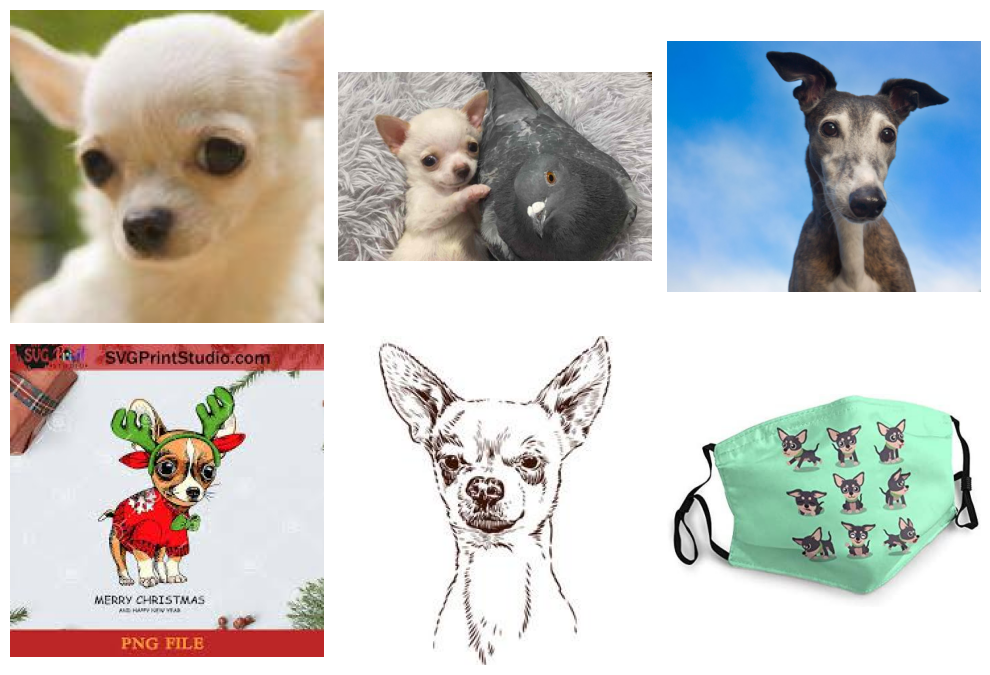

In [ ]:
folder = '/content/train/chihuahua'
count = 7

# Create subplots with two rows and three columns
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for i, img in enumerate(os.listdir(folder)):
    if count <= 0:
        break

    p = os.path.join(folder, img)
    with Image.open(p) as im:
        # Calculate the subplot position
        row = i // 3
        col = i % 3

        # Check if the subplot position is within bounds
        if row < 2 and col < 3:
            # Display the image on the corresponding subplot
            axes[row, col].imshow(im)
            axes[row, col].axis('off')  # Turn off axis labels

        count -= 1

# Adjust layout to prevent clipping of subplot titles
plt.tight_layout()
plt.show()

Transform the jpg images into RGB

In [ ]:
# Directory where images are
root_directory = '/content/train'

# Specify the output directory where RGB images will be saved
output_directory = '/content/train_RGB'

# Function to convert an image to RGB
def convert_to_RGB(input_path, output_path):
    try:
        img = Image.open(input_path)
        img=img.convert('RGB') # Convert to RGB
        img.save(output_path)
        print(f'Converted to RGB: {output_path}')
    except Exception as e:
        print(f'Error converting {input_path} to RGB: {e}')

# Function to convert images to RGB in a directory and its subdirectories
def convert_images_to_RGB_in_directory(directory, output_dir):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file has a common image file extension (you can extend this list)
            if file.lower().endswith(('.jpg')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, directory)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                convert_to_RGB(input_path, output_path)

# Call the function
convert_images_to_RGB_in_directory(root_directory, output_directory)

Converted to RGB: /content/train_RGB/muffin/img_3_32.jpg
Converted to RGB: /content/train_RGB/muffin/img_4_700.jpg
Converted to RGB: /content/train_RGB/muffin/img_0_399.jpg
Converted to RGB: /content/train_RGB/muffin/img_3_436.jpg
Converted to RGB: /content/train_RGB/muffin/img_3_1122.jpg
Converted to RGB: /content/train_RGB/muffin/img_1_311.jpg
Converted to RGB: /content/train_RGB/muffin/img_2_734.jpg
Converted to RGB: /content/train_RGB/muffin/img_4_445.jpg
Converted to RGB: /content/train_RGB/muffin/img_2_517.jpg
Converted to RGB: /content/train_RGB/muffin/img_1_834.jpg
Converted to RGB: /content/train_RGB/muffin/img_4_10.jpg
Converted to RGB: /content/train_RGB/muffin/img_2_524.jpg
Converted to RGB: /content/train_RGB/muffin/img_2_1073.jpg
Converted to RGB: /content/train_RGB/muffin/img_3_130.jpg
Converted to RGB: /content/train_RGB/muffin/img_1_215.jpg
Converted to RGB: /content/train_RGB/muffin/img_1_243.jpg
Converted to RGB: /content/train_RGB/muffin/img_1_52.jpg
Converted to RG

Converting to greyscale also the test set

In [ ]:
# Directory where images are
root_directory = '/content/test'

# Specify the output directory where RGB images will be saved
output_directory = '/content/test_RGB'

# Call the function
convert_images_to_RGB_in_directory(root_directory, output_directory)

Converted to RGB: /content/test_RGB/muffin/img_2_344.jpg
Converted to RGB: /content/test_RGB/muffin/img_3_385.jpg
Converted to RGB: /content/test_RGB/muffin/img_2_78.jpg
Converted to RGB: /content/test_RGB/muffin/img_0_822.jpg
Converted to RGB: /content/test_RGB/muffin/img_4_858.jpg
Converted to RGB: /content/test_RGB/muffin/img_0_105.jpg
Converted to RGB: /content/test_RGB/muffin/img_4_864.jpg
Converted to RGB: /content/test_RGB/muffin/img_4_746.jpg
Converted to RGB: /content/test_RGB/muffin/img_1_849.jpg
Converted to RGB: /content/test_RGB/muffin/img_0_835.jpg
Converted to RGB: /content/test_RGB/muffin/img_4_325.jpg
Converted to RGB: /content/test_RGB/muffin/img_3_447.jpg
Converted to RGB: /content/test_RGB/muffin/img_3_91.jpg
Converted to RGB: /content/test_RGB/muffin/img_2_116.jpg
Converted to RGB: /content/test_RGB/muffin/img_1_137.jpg
Converted to RGB: /content/test_RGB/muffin/img_2_314.jpg
Converted to RGB: /content/test_RGB/muffin/img_4_826.jpg
Converted to RGB: /content/test_R

Data exploration

In [ ]:
dir='/content/train_RGB/chihuahua/img_0_0.jpg'
with Image.open(dir) as img:
     img.load()

In [ ]:
img.size

(612, 612)

In [ ]:
dir='/content/train_RGB/chihuahua/img_0_101.jpg'
with Image.open(dir) as img:
     img.load()

In [ ]:
img.size

(1300, 1096)

Check if the image is in RGB, it is if mode= 'RGB'

In [ ]:
img.mode

'RGB'

Resizing the images in order to have them all in the same shape

In [ ]:
# Specify the directory where your images are located
root_directory = '/content/train_RGB'

# Specify the output directory where resized images will be saved
output_directory = '/content/train_RGB'

# Function to resize an image
def resize_image(input_path, output_path, size):
    try:
        img = Image.open(input_path)
        img = img.resize(size)
        img.save(output_path)
        print(f'Resized: {output_path}')
    except Exception as e:
        print(f'Error resizing {input_path}: {e}')

# Function to resize images in a directory and its subdirectories
def resize_images_in_directory(directory, output_dir, size=(100, 100)):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file has a common image file extension (you can extend this list)
            if file.lower().endswith(('.jpg')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, directory)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                resize_image(input_path, output_path, size)

# Call the function with the root directory and desired output directory
resize_images_in_directory(root_directory, output_directory, size=(224, 224))

Resized: /content/train_RGB/muffin/img_3_32.jpg
Resized: /content/train_RGB/muffin/img_4_700.jpg
Resized: /content/train_RGB/muffin/img_0_399.jpg
Resized: /content/train_RGB/muffin/img_3_436.jpg
Resized: /content/train_RGB/muffin/img_3_1122.jpg
Resized: /content/train_RGB/muffin/img_1_311.jpg
Resized: /content/train_RGB/muffin/img_2_734.jpg
Resized: /content/train_RGB/muffin/img_4_445.jpg
Resized: /content/train_RGB/muffin/img_2_517.jpg
Resized: /content/train_RGB/muffin/img_1_834.jpg
Resized: /content/train_RGB/muffin/img_4_10.jpg
Resized: /content/train_RGB/muffin/img_2_524.jpg
Resized: /content/train_RGB/muffin/img_2_1073.jpg
Resized: /content/train_RGB/muffin/img_3_130.jpg
Resized: /content/train_RGB/muffin/img_1_215.jpg
Resized: /content/train_RGB/muffin/img_1_243.jpg
Resized: /content/train_RGB/muffin/img_1_52.jpg
Resized: /content/train_RGB/muffin/img_2_1090.jpg
Resized: /content/train_RGB/muffin/img_0_141.jpg
Resized: /content/train_RGB/muffin/img_4_652.jpg
Resized: /content/tr

In [ ]:
# Specify the directory where your images are located
root_directory = '/content/test_RGB'

# Specify the output directory where resized images will be saved
output_directory = '/content/test_RGB'

# Call the function with the root directory and desired output directory
resize_images_in_directory(root_directory, output_directory, size=(224, 224))

Resized: /content/test_RGB/muffin/img_2_344.jpg
Resized: /content/test_RGB/muffin/img_3_385.jpg
Resized: /content/test_RGB/muffin/img_2_78.jpg
Resized: /content/test_RGB/muffin/img_0_822.jpg
Resized: /content/test_RGB/muffin/img_4_858.jpg
Resized: /content/test_RGB/muffin/img_0_105.jpg
Resized: /content/test_RGB/muffin/img_4_864.jpg
Resized: /content/test_RGB/muffin/img_4_746.jpg
Resized: /content/test_RGB/muffin/img_1_849.jpg
Resized: /content/test_RGB/muffin/img_0_835.jpg
Resized: /content/test_RGB/muffin/img_4_325.jpg
Resized: /content/test_RGB/muffin/img_3_447.jpg
Resized: /content/test_RGB/muffin/img_3_91.jpg
Resized: /content/test_RGB/muffin/img_2_116.jpg
Resized: /content/test_RGB/muffin/img_1_137.jpg
Resized: /content/test_RGB/muffin/img_2_314.jpg
Resized: /content/test_RGB/muffin/img_4_826.jpg
Resized: /content/test_RGB/muffin/img_2_93.jpg
Resized: /content/test_RGB/muffin/img_4_520.jpg
Resized: /content/test_RGB/muffin/img_2_29.jpg
Resized: /content/test_RGB/muffin/img_0_73.j

In [ ]:
dir='/content/train_RGB/chihuahua/img_0_0.jpg'
with Image.open(dir) as img:
     img.load()
img.size

(224, 224)

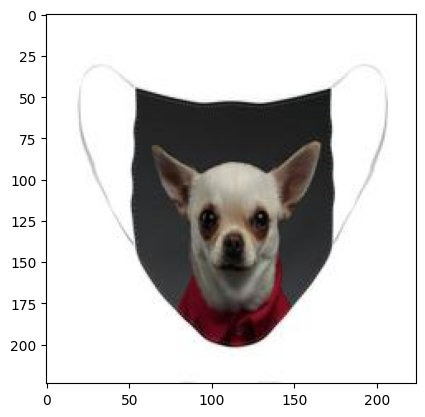

In [ ]:
dir='/content/train_RGB/chihuahua/img_0_1022.jpg'
with Image.open(dir) as img:
     img.load()
img.size
plt.imshow(img)
plt.show()

Print some chiuaua images

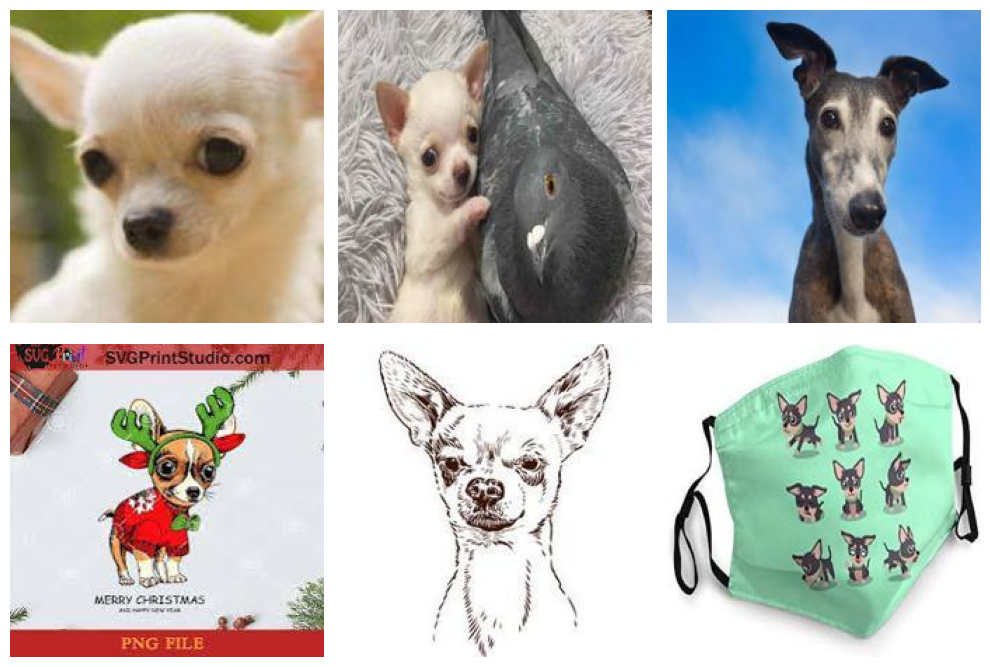

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
folder = '/content/train_RGB/chihuahua'
count = 7
# Create subplots with two rows and three columns
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for i, img in enumerate(os.listdir(folder)):
    if count <= 0:
        break

    p = os.path.join(folder, img)
    with Image.open(p) as im:
        # Calculate the subplot position
        row = i // 3
        col = i % 3

        # Check if the subplot position is within bounds
        if row < 2 and col < 3:
            # Display the image on the corresponding subplot
            axes[row, col].imshow(im)
            axes[row, col].axis('off')  # Turn off axis labels

        count -= 1

# Adjust layout to prevent clipping of subplot titles
plt.tight_layout()
plt.show()

Print some muffin Images

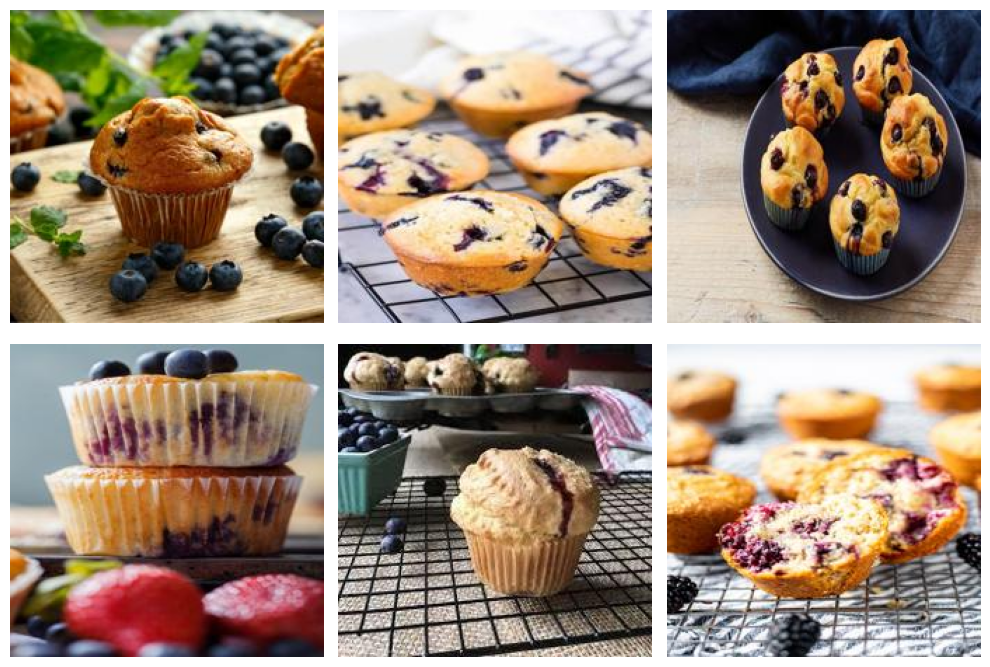

In [ ]:
folder = '/content/train_RGB/muffin'
count = 7
# Create subplots with two rows and three columns
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for i, img in enumerate(os.listdir(folder)):
    if count <= 0:
        break

    p = os.path.join(folder, img)
    with Image.open(p) as im:
        # Calculate the subplot position
        row = i // 3
        col = i % 3

        # Check if the subplot position is within bounds
        if row < 2 and col < 3:
            # Display the image on the corresponding subplot
            axes[row, col].imshow(im)
            axes[row, col].axis('off')  # Turn off axis labels

        count -= 1

# Adjust layout to prevent clipping of subplot titles
plt.tight_layout()
plt.show()

Label and data

First CNN easy one

In this first part this few operations are going to be performed:


*   Data normalization
*   Train and Validation splitting
*   Data augmentation




This is very important in order to prevent overfitting and generalize the model

In [ ]:
# Rescaling images
tv_datagenerat = ImageDataGenerator(
    rescale=1.0 / 255,# Rescale pixel values to the range [0, 1]
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    validation_split=0.2
)
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = tv_datagenerat.flow_from_directory(
    directory=r'/content/train_RGB',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=10,
    shuffle=True
)

Found 3788 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)

{'chihuahua': 0, 'muffin': 1}


In [ ]:
print(train_generator.classes)

[0 0 0 ... 1 1 1]


In [ ]:
valid_generator= tv_datagenerat.flow_from_directory(
    directory=r'/content/train_RGB',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=10,
    shuffle=True
)

Found 945 images belonging to 2 classes.


In [ ]:
print(valid_generator.class_indices)

{'chihuahua': 0, 'muffin': 1}


In [ ]:
print(valid_generator.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
test_generat=test_datagen.flow_from_directory(
    directory=r'/content/test_RGB',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1184 images belonging to 2 classes.


In [ ]:
print(test_generat.class_indices)

{'chihuahua': 0, 'muffin': 1}


In [ ]:
print(test_generat.classes)

[0 0 0 ... 1 1 1]


Show random image from train and test set

In [ ]:
import random
import matplotlib.pyplot as plt

Let's start by trying a simple model and understan how it performs with those data

In [ ]:
#defining model
def My_Second_Cnn():
  model_2=Sequential()

  #adding convolution layer
  model_2.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
  #adding pooling layer
  model_2.add(MaxPool2D(pool_size=(2,2)))
  #Dropoutlayer
  model_2.add(Dropout(0.05))

  ###Second Convolutional Layer
  model_2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
  model_2.add(MaxPool2D(pool_size=(2,2)))
  model_2.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_2.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
  model_2.add(MaxPool2D(pool_size=(2,2)))
  model_2.add(Dropout(0.05))

  #adding fully connected layer
  model_2.add(Flatten())
  model_2.add(Dense(128,activation='relu'))
  model_2.add(Dropout(0.05))

  #adding output layer
  model_2.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2

In [ ]:
Second_model=My_Second_Cnn()

In [ ]:
mod_two=Second_model.fit(train_generator,validation_data = valid_generator,epochs=40,batch_size=32)

Epoch 1/40
119/119 [==============================] - 77s 580ms/step - loss: 0.6579 - accuracy: 0.6777 - val_loss: 0.4694 - val_accuracy: 0.7926
Epoch 2/40
119/119 [==============================] - 67s 568ms/step - loss: 0.4627 - accuracy: 0.7925 - val_loss: 0.4062 - val_accuracy: 0.8402
Epoch 3/40
119/119 [==============================] - 67s 564ms/step - loss: 0.4124 - accuracy: 0.8186 - val_loss: 0.3030 - val_accuracy: 0.8783
Epoch 4/40
119/119 [==============================] - 67s 557ms/step - loss: 0.3912 - accuracy: 0.8284 - val_loss: 0.3563 - val_accuracy: 0.8667
Epoch 5/40
119/119 [==============================] - 67s 564ms/step - loss: 0.3662 - accuracy: 0.8498 - val_loss: 0.2937 - val_accuracy: 0.8751
Epoch 6/40
119/119 [==============================] - 67s 564ms/step - loss: 0.3327 - accuracy: 0.8582 - val_loss: 0.3208 - val_accuracy: 0.8709
Epoch 7/40
119/119 [==============================] - 67s 565ms/step - loss: 0.2951 - accuracy: 0.8720 - val_loss: 0.2611 - val_ac

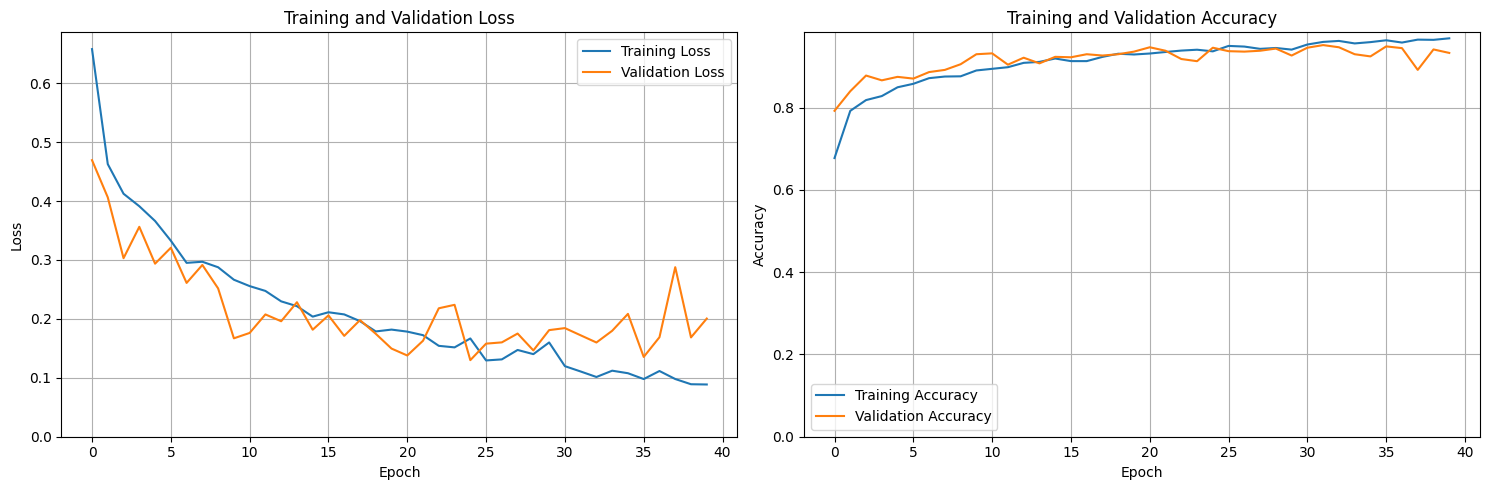

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_two.history['loss']
val_loss = mod_two.history['val_loss']
accuracy = mod_two.history['accuracy']
val_accuracy = mod_two.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=Second_model.evaluate(test_generat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 2s 65ms/step - loss: 0.1865 - accuracy: 0.9291
Test accuracy: 0.9290540814399719
Test loss: 0.18650412559509277


We can see that this first model works quite well with an accuracy of 93% and a loss of 17%

Variation of the second model adding strides to the first convolutional network


In [ ]:
#defining model
def My_Second_Cnn_1():
  model_2_1=Sequential()

  #adding convolution layer
  model_2_1.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
  #adding pooling layer
  model_2_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #Dropoutlayer
  model_2_1.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_2_1.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
  model_2_1.add(MaxPool2D(pool_size=(2,2)))
  model_2_1.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_2_1.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
  model_2_1.add(MaxPool2D(pool_size=(2,2)))
  model_2_1.add(Dropout(0.05))

  #adding fully connected layer
  model_2_1.add(Flatten())
  model_2_1.add(Dense(128,activation='relu'))
  model_2_1.add(Dropout(0.05))

  #adding output layer
  model_2_1.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2_1

In [ ]:
Second_model_1=My_Second_Cnn_1()

In [ ]:
mod_two_1=Second_model_1.fit(train_generator,validation_data = valid_generator,epochs=40,batch_size=32)

Plot

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_two_1.history['loss']
val_loss = mod_two_1.history['val_loss']
accuracy = mod_two_1.history['accuracy']
val_accuracy = mod_two_1.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=Second_model_1.evaluate(test_generat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

The same Model with Hyperparameter tuning

In [ ]:
#defining model
def My_Second_Cnn_5(param):
  model_2_5=Sequential()

  #adding convolution layer
  model_2_5.add(Conv2D(filters=param.Int('conv1_filter', min_value=32, max_value=256, step=16),kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
  #adding pooling layer
  model_2_5.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #Dropoutlayer
  model_2_5.add(Dropout(param.Float('drop_1', min_value=0.0, max_value=0.5, step=0.05)))


  ###Second Convolutional Layer
  model_2_5.add(Conv2D(filters=param.Int('conv2_filter', min_value=32, max_value=256, step=16),kernel_size=(3,3),activation='relu'))
  model_2_5.add(MaxPool2D(pool_size=(2,2)))
  model_2_5.add(Dropout(param.Float('drop_2', min_value=0.0, max_value=0.5, step=0.05)))

  ###Third Convolutional Layer
  model_2_5.add(Conv2D(filters=param.Int('conv3_filter', min_value=32, max_value=256, step=16),kernel_size=(3,3),activation='relu'))
  model_2_5.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_2_5.add(Dropout(param.Float('drop_3', min_value=0.0, max_value=0.5, step=0.05)))

  #adding fully connected layer
  model_2_5.add(Flatten())
  model_2_5.add(Dense(units=param.Int('units', min_value=32, max_value=256, step=16),activation='relu'))
  model_2_5.add(Dropout(param.Float('drop_4', min_value=0.0, max_value=0.5, step=0.05)))

  #adding output layer
  model_2_5.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2_5

In [ ]:
import keras_tuner
from tensorflow import keras

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Second_Cnn_5,
  objective='val_accuracy',
  max_trials=7,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='Chiuaua-muffin',
  overwrite=True)

In [ ]:
#perform the hyperparameter search, training with 8
tuner_r.search(train_generator,validation_data = valid_generator, epochs=8)

In [ ]:
#defining model
def My_Second_Cnn_5():
  model_2_5=Sequential()

  #adding convolution layer
  model_2_5.add(Conv2D(filters=144,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
  #adding pooling layer
  model_2_5.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #Dropoutlayer
  model_2_5.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_2_5.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
  model_2_5.add(MaxPool2D(pool_size=(2,2)))
  model_2_5.add(Dropout(0.35))

  ###Third Convolutional Layer
  model_2_5.add(Conv2D(filters=112,kernel_size=(3,3),activation='relu'))
  model_2_5.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_2_5.add(Dropout(0.4))

  #adding fully connected layer
  model_2_5.add(Flatten())
  model_2_5.add(Dense(units=32,activation='relu'))

  #adding output layer
  model_2_5.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2_5

In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

In [ ]:
model_best_2= tuner_r.hypermodel.build(best_hps)

In [ ]:
model_best_2=My_Second_Cnn_5()

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mm_40=model_best_2.fit(train_generator,validation_data = valid_generator, epochs=40,callbacks=[early_stop], verbose=1, batch_size=32)

In [ ]:
mt40=model_best_2.evaluate(test_generat)

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mm_40.history['loss']
val_loss = mm_40.history['val_loss']
accuracy = mm_40.history['accuracy']
val_accuracy = mm_40.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

I used the tuned parameter in the following model

In [ ]:
#defining model
def My_Second_Cnn_5():
  model_2_5=Sequential()

  #adding convolution layer
  model_2_5.add(Conv2D(96,kernel_size=(3,3),activation='relu',input_shape=(224,224,3), padding='same'))
  #adding pooling layer
  model_2_5.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_5.add(Dropout(0.1))


  ###Second Convolutional Layer
  model_2_5.add(Conv2D(80,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_5.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_5.add(Dropout(0.1))

  ###Third Convolutional Layer
  model_2_5.add(Conv2D(96,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_5.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_2_5.add(Dropout(0.1))

  #adding fully connected layer
  model_2_5.add(Flatten())
  model_2_5.add(Dense(128,activation='relu'))
  model_2_5.add(Dropout(0.1))

  #adding output layer
  model_2_5.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2_5

In [ ]:
Second_model_5=My_Second_Cnn_5()

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mod_two_5=Second_model_5.fit(train_generator,validation_data = valid_generator,epochs=40,callbacks=[early_stop], verbose=1,batch_size=32)

In [ ]:
test_loss,test_acc=Second_model_5.evaluate(test_generat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_two_5.history['loss']
val_loss = mod_two_5.history['val_loss']
accuracy = mod_two_5.history['accuracy']
val_accuracy = mod_two_5.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

Hyperparameter tuning for all the drop

In [ ]:
#defining model
def My_Second_Cnn_6(param):
  model_2_6=Sequential()

  #adding convolution layer
  model_2_6.add(Conv2D(96,kernel_size=(3,3),activation='relu',input_shape=(224,224,3), padding='same'))
  #adding pooling layer
  model_2_6.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_6.add(Dropout(param.Float('drop_1', min_value=0.0, max_value=0.5, step=0.05)))


  ###Second Convolutional Layer
  model_2_6.add(Conv2D(80,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_6.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_6.add(Dropout(param.Float('drop_2', min_value=0.0, max_value=0.5, step=0.05)))

  ###Third Convolutional Layer
  model_2_6.add(Conv2D(96,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_6.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model_2_6.add(Dropout(param.Float('drop_3', min_value=0.0, max_value=0.3, step=0.05)))

  #adding fully connected layer
  model_2_6.add(Flatten())
  model_2_6.add(Dense(128,activation='relu'))
  model_2_6.add(Dropout(param.Float('drop_4', min_value=0.0, max_value=0.3, step=0.05)))

  #adding output layer
  model_2_6.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model_2_6

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Second_Cnn_6,
  objective='val_accuracy',
  max_trials=5,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='Chiuaua-muffin',
  overwrite=True)

In [ ]:
#perform the hyperparameter search, training with 8
tuner_r.search(train_generator,validation_data = valid_generator, epochs=8)

In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

In [ ]:
model_best_2= tuner_r.hypermodel.build(best_hps)

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mm_40_6=model_best_2.fit(train_generator,validation_data = valid_generator, epochs=40,callbacks=[early_stop], verbose=1, batch_size=32)

In [ ]:
mt40=model_best_2.evaluate(test_generat)

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mm_40_6.history['loss']
val_loss = mm_40_6.history['val_loss']
accuracy = mm_40_6.history['accuracy']
val_accuracy = mm_40_6.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

Same model with tuning of the learning rate

In [ ]:
#defining model
def My_Second_Cnn_7(param):
  model_2_7=Sequential()

  #adding convolution layer
  model_2_7.add(Conv2D(96,kernel_size=(3,3),activation='relu',input_shape=(224,224,3), padding='same'))
  #adding pooling layer
  model_2_7.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_7.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_2_7.add(Conv2D(80,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_7.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_7.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_2_7.add(Conv2D(96,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_7.add(MaxPool2D(pool_size=(2,2), padding='same'))

  #adding fully connected layer
  model_2_7.add(Flatten())
  model_2_7.add(Dense(128,activation='relu'))
  model_2_7.add(Dropout(0.15))

  #adding output layer
  model_2_7.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_7.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= param.Float('learning_rate',min_value=1e-6, max_value=1e-2, sampling='log')),metrics=['accuracy'])

  return model_2_7

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Second_Cnn_7,
  objective='val_accuracy',
  max_trials=7,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='Chiuaua-muffin',
  overwrite=True)

In [ ]:
#perform the hyperparameter search, training with 8
tuner_r.search(train_generator,validation_data = valid_generator, epochs=8)

In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

In [ ]:
model_best_2_7= tuner_r.hypermodel.build(best_hps)

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mm_40_7=model_best_2_7.fit(train_generator,validation_data = valid_generator, epochs=40,callbacks=[early_stop], verbose=1, batch_size=32)

In [ ]:
mt40=model_best_2_7.evaluate(test_generat)

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mm_40_7.history['loss']
val_loss = mm_40_7.history['val_loss']
accuracy = mm_40_7.history['accuracy']
val_accuracy = mm_40_7.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

 **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
test_predic_s = model_best_2_7.predict(test_generat)
test_predic = [0 if val < 0.5 else 1 for val in test_predic_s]

test_true_labels = test_generat.classes

cm = confusion_matrix(test_true_labels, test_predic)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

Calculate Precision, Recall and F1 score

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = test_predic
y_test = test_true_labels

precision, recall, fscore, support = score(y_test, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

Roc Curve

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predic_s)

# ROC AUC
auc = roc_auc_score(y_test,test_predic_s)
print('ROC AUC: %f' % auc)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Round 0.0009568198929785127 to 0.001

Optimizing the kernel size

In [ ]:
#defining model
def My_Second_Cnn_8(param):
  model_2_8=Sequential()

  #adding convolution layer
  model_2_8.add(Conv2D(96,kernel_size=param.Choice('conv_1_kernel', values = [3,5,11,16]),activation='relu',input_shape=(224,224,3), padding='same'))
  #adding pooling layer
  model_2_8.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_8.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_2_8.add(Conv2D(80,kernel_size=param.Choice('conv_2_kernel', values = [3,5,11,16]),activation='relu',padding='same'))
  model_2_8.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_8.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_2_8.add(Conv2D(96,kernel_size=param.Choice('conv_3_kernel', values = [3,5,11,16]),activation='relu',padding='same'))
  model_2_8.add(MaxPool2D(pool_size=(2,2), padding='same'))

  #adding fully connected layer
  model_2_8.add(Flatten())
  model_2_8.add(Dense(128,activation='relu'))
  model_2_8.add(Dropout(0.15))

  #adding output layer
  model_2_8.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_8.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= 0.001),metrics=['accuracy'])

  return model_2_8

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Second_Cnn_8,
  objective='val_accuracy',
  max_trials=8,
  directory='keras_tuner',
  project_name='Chiuaua-muffin',
  overwrite=True)

In [ ]:
#perform the hyperparameter search, training with 5
tuner_r.search(train_generator,validation_data = valid_generator, epochs=8)

In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

In [ ]:
model_best_2_8= tuner_r.hypermodel.build(best_hps)

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=20)
mm_40_8=model_best_2_8.fit(train_generator,validation_data = valid_generator, epochs=40,callbacks=[early_stop], verbose=1, batch_size=32)

In [ ]:
test_loss,test_acc=model_best_2_8.evaluate(test_generat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mm_40_8.history['loss']
val_loss = mm_40_8.history['val_loss']
accuracy = mm_40_8.history['accuracy']
val_accuracy = mm_40_8.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

Confusion Matrix

In [ ]:
test_predic_s = model_best_2_8.predict(test_generat)
test_predic = [0 if val < 0.5 else 1 for val in test_predic_s]

test_true_labels = test_generat.classes

cm = confusion_matrix(test_true_labels, test_predic)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

Precision, Recall, F1 score and support

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = test_predic
y_test = test_true_labels

precision, recall, fscore, support = score(y_test, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

Roc curve plot

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predic_s)

# ROC AUC
auc = roc_auc_score(y_test,test_predic_s)
print('ROC AUC: %f' % auc)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Fourth CNN with batchnormalization

In [ ]:
#defining model
def My_Second_Cnn_9():
  model_2_9=Sequential()

  #adding convolution layer
  model_2_9.add(Conv2D(96,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
  model_2_9.add(BatchNormalization())
  #adding pooling layer
  model_2_9.add(MaxPool2D(pool_size=(2,2)))


  ###Second Convolutional Layer
  model_2_9.add(Conv2D(80,kernel_size=(11,11),activation='relu'))
  model_2_9.add(BatchNormalization())
  model_2_9.add(MaxPool2D(pool_size=(2,2)))
  model_2_9.add(Dropout(0.1))


  ###Third Convolutional Layer
  model_2_9.add(Conv2D(96,kernel_size=(3,3),activation='relu'))
  model_2_9.add(BatchNormalization())
  model_2_9.add(MaxPool2D(pool_size=(2,2)))


  #adding fully connected layer
  model_2_9.add(Flatten())
  model_2_9.add(Dense(128,activation='relu'))
  model_2_9.add(Dropout(0.15))

  #adding output layer
  model_2_9.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_9.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

  return model_2_9

In [ ]:
Second_model_9=My_Second_Cnn_9()

In [ ]:
mod_sec_9=Second_model_9.fit(train_generator,validation_data = valid_generator,epochs=40,batch_size=32)

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_sec_9.history['loss']
val_loss = mod_sec_9.history['val_loss']
accuracy = mod_sec_9.history['accuracy']
val_accuracy = mod_sec_9.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=Second_model_9.evaluate(test_generat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

Confusion Matrix

In [ ]:
test_predic_s = Second_model_9.predict(test_generat)
test_predic = [0 if val < 0.5 else 1 for val in test_predic_s]

test_true_labels = test_generat.classes

cm = confusion_matrix(test_true_labels, test_predic)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

Recall, Precision, F1

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = test_predic
y_test = test_true_labels

precision, recall, fscore, support = score(y_test, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

Roc curve

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predic_s)

# ROC AUC
auc = roc_auc_score(y_test,test_predic_s)
print('ROC AUC: %f' % auc)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Best model final:

In [ ]:
#defining model
def My_Second_Cnn_7():
  model_2_7=Sequential()

  #adding convolution layer
  model_2_7.add(Conv2D(96,kernel_size=(3,3),activation='relu',input_shape=(224,224,3), padding='same'))
  #adding pooling layer
  model_2_7.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_7.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_2_7.add(Conv2D(80,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_7.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_7.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_2_7.add(Conv2D(96,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_7.add(MaxPool2D(pool_size=(2,2), padding='same'))

  #adding fully connected layer
  model_2_7.add(Flatten())
  model_2_7.add(Dense(128,activation='relu'))
  model_2_7.add(Dropout(0.15))

  #adding output layer
  model_2_7.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_7.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= 0.001),metrics=['accuracy'])

  return model_2_7

In [ ]:
Second_model_7=My_Second_Cnn_7()

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=40,restore_best_weights=True)

In [ ]:
mod_sec_7=Second_model_7.fit(train_generator,validation_data = valid_generator,epochs=60, callbacks=[early_stop],batch_size=32)

Epoch 1/60
119/119 [==============================] - 85s 618ms/step - loss: 0.8141 - accuracy: 0.5306 - val_loss: 0.6678 - val_accuracy: 0.5407
Epoch 2/60
119/119 [==============================] - 72s 605ms/step - loss: 0.6559 - accuracy: 0.6423 - val_loss: 0.5454 - val_accuracy: 0.7460
Epoch 3/60
119/119 [==============================] - 70s 592ms/step - loss: 0.5170 - accuracy: 0.7650 - val_loss: 0.4949 - val_accuracy: 0.7799
Epoch 4/60
119/119 [==============================] - 69s 576ms/step - loss: 0.4890 - accuracy: 0.7775 - val_loss: 0.4839 - val_accuracy: 0.7778
Epoch 5/60
119/119 [==============================] - 69s 579ms/step - loss: 0.4406 - accuracy: 0.8062 - val_loss: 0.4004 - val_accuracy: 0.8370
Epoch 6/60
119/119 [==============================] - 79s 665ms/step - loss: 0.4338 - accuracy: 0.8107 - val_loss: 0.3859 - val_accuracy: 0.8402
Epoch 7/60
119/119 [==============================] - 69s 579ms/step - loss: 0.4012 - accuracy: 0.8260 - val_loss: 0.3310 - val_ac

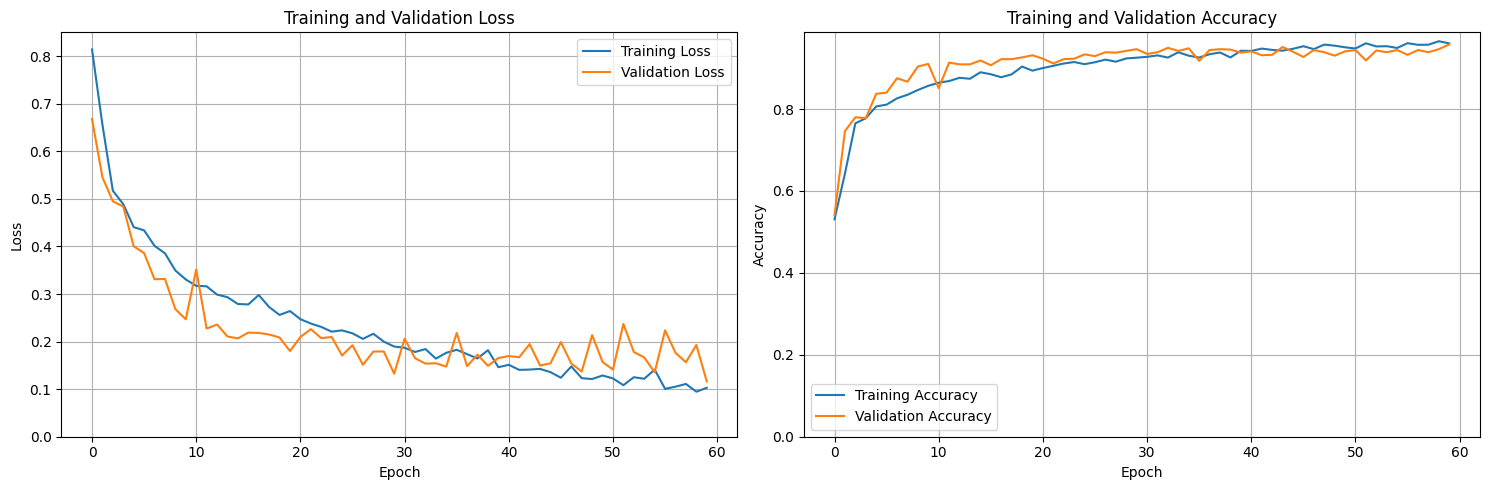

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mod_sec_7.history['loss']
val_loss = mod_sec_7.history['val_loss']
accuracy = mod_sec_7.history['accuracy']
val_accuracy = mod_sec_7.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=Second_model_7.evaluate(test_generat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

37/37 [==============================] - 2s 51ms/step - loss: 0.1937 - accuracy: 0.9367
Test accuracy: 0.9366554021835327
Test loss: 0.19367152452468872


37/37 [==============================] - 2s 55ms/step


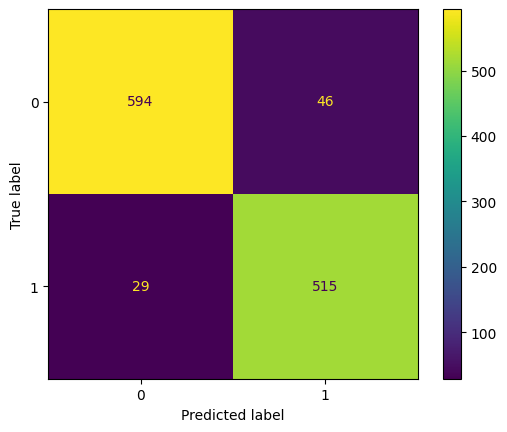

In [ ]:
test_predic_s = Second_model_7.predict(test_generat)
test_predic = [0 if val < 0.5 else 1 for val in test_predic_s]

test_true_labels = test_generat.classes

cm = confusion_matrix(test_true_labels, test_predic)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = test_predic
y_test = test_true_labels

precision, recall, fscore, support = score(y_test, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.95345104 0.91800357]
recall: [0.928125   0.94669118]
fscore: [0.94061758 0.9321267 ]
support: [640 544]


ROC AUC: 0.981445


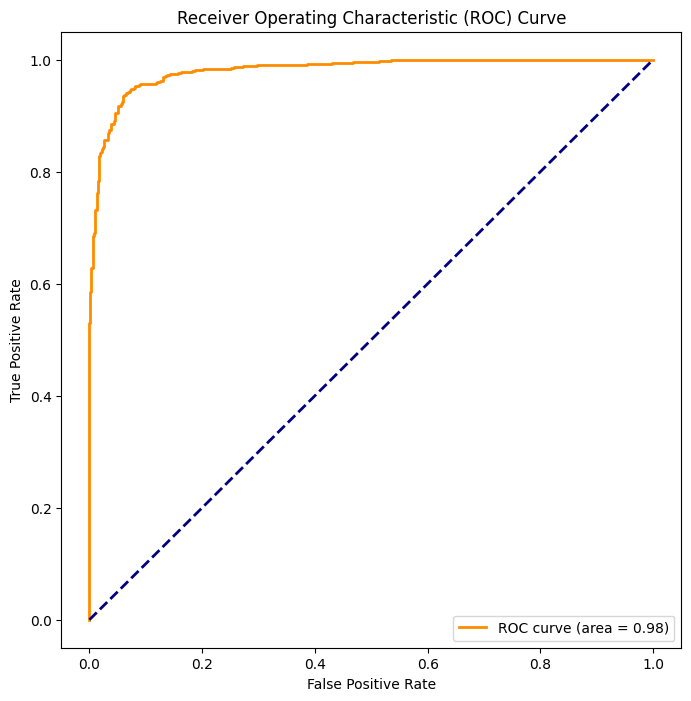

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predic_s)

# ROC AUC
auc = roc_auc_score(y_test,test_predic_s)
print('ROC AUC: %f' % auc)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

K-fold cross validation with the models that had the best results

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
!pip install --upgrade tensorflow scikit-learn
!pip install scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from tensorflow.keras.layers import Input, RandomFlip, RandomRotation
from sklearn.model_selection import KFold
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
import os
import pandas as pd

# Set the paths to your data directories
Muffin_dir_tr = '/content/train_RGB/muffin'
Chihuahua_dir_te = '/content/test_RGB/chihuahua'

# Create DataFrames for each class
df_muffin = pd.DataFrame({"file_name": [os.path.join(Muffin_dir_tr, i) for i in os.listdir(Muffin_dir_tr)]})
df_muffin["label"] = "muffin"

# Add more data to muffin:
Muffin_dir_te = '/content/test_RGB/muffin' # Replace with the path to your additional cat data
df_additional_muff = pd.DataFrame({"file_name": [os.path.join(Muffin_dir_te, i) for i in os.listdir(Muffin_dir_te)]})
df_additional_muff["label"] = "muffin"

# Create DataFrames for each class
df_chihuahua = pd.DataFrame({"file_name": [os.path.join(Chihuahua_dir_te, i) for i in os.listdir(Chihuahua_dir_te)]})
df_chihuahua["label"] = "chihuahua"

# Add more data to chihuahua
chihuahua_dir_tr = '/content/train_RGB/chihuahua' # Replace with the path to your additional cat data
df_additional_chihuahua = pd.DataFrame({"file_name": [os.path.join(chihuahua_dir_tr, i) for i in os.listdir(chihuahua_dir_tr)]})
df_additional_chihuahua["label"] = "chihuahua"

# Concatenate chihiahua with the additional data
df_all = pd.concat([df_muffin, df_additional_muff,df_chihuahua,df_additional_chihuahua], ignore_index=True)


In [ ]:
df_all.head()

file_name   label
0   /content/train_RGB/muffin/img_4_323.jpg  muffin
1  /content/train_RGB/muffin/img_3_1117.jpg  muffin
2   /content/train_RGB/muffin/img_4_885.jpg  muffin
3     /content/train_RGB/muffin/img_1_0.jpg  muffin
4   /content/train_RGB/muffin/img_0_932.jpg  muffin

In [ ]:
from tensorflow.keras.preprocessing import image

Second Attempt to K-fold Cross Validation with Imagedatagenerator

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save DataFrame to CSV
csv_path = '/content/df_all.csv'
df_all.to_csv(csv_path, index=False)

In [ ]:
dat = np.array(df_all['file_name'])
print(dat)

['/content/train_RGB/muffin/img_4_323.jpg'
 '/content/train_RGB/muffin/img_3_1117.jpg'
 '/content/train_RGB/muffin/img_4_885.jpg' ...
 '/content/train_RGB/chihuahua/img_2_950.jpg'
 '/content/train_RGB/chihuahua/img_2_234.jpg'
 '/content/train_RGB/chihuahua/img_0_187.jpg']


In summary, this code takes your original DataFrame (df_all), shuffles the rows randomly, and then displays the last few rows of the shuffled DataFrame. It's often used when you want to randomize the order of your data, for example, before splitting it into training and testing sets in machine learning to ensure a random distribution of classes in both sets.

In [ ]:
shuffled = df_all.sample(frac=1,random_state=1)
shuffled.tail()

file_name      label
905      /content/train_RGB/muffin/img_4_243.jpg     muffin
5192  /content/train_RGB/chihuahua/img_0_966.jpg  chihuahua
3980  /content/train_RGB/chihuahua/img_1_954.jpg  chihuahua
235      /content/train_RGB/muffin/img_1_383.jpg     muffin
5157  /content/train_RGB/chihuahua/img_4_869.jpg  chihuahua

In [ ]:
k = 5
kf_ = KFold(n_splits=k, random_state=333, shuffle=True)
kf=StratifiedKFold(n_splits=k, random_state=333, shuffle=True)

acc_score = []
loss_score = []
classification_error= []

Data normalization and augmentation

In [ ]:
datagenA = ImageDataGenerator(rescale=1.0/255,
    zoom_range=0.2,
    horizontal_flip=False,
    rotation_range=20,
    width_shift_range=0.2,
    validation_split=0.2)
datagenB= ImageDataGenerator( rescale= 1.0/255)

K-fold CV with the model My_Fourth_Cnn_3

In [ ]:
#defining model
def My_Second_Cnn_7():
  model_2_7=Sequential()

  #adding convolution layer
  model_2_7.add(Conv2D(96,kernel_size=(3,3),activation='relu',input_shape=(224,224,3), padding='same'))
  #adding pooling layer
  model_2_7.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_7.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_2_7.add(Conv2D(80,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_7.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_7.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_2_7.add(Conv2D(96,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_7.add(MaxPool2D(pool_size=(2,2), padding='same'))

  #adding fully connected layer
  model_2_7.add(Flatten())
  model_2_7.add(Dense(128,activation='relu'))
  model_2_7.add(Dropout(0.15))

  #adding output layer
  model_2_7.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_7.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= 0.001),metrics=['accuracy'])

  return model_2_7

Applying stratified Kfold Cross validation.

In [ ]:
for train_index , test_index in kf.split(df_all, df_all['label']):
    X_train = df_all.iloc[train_index]
    X_test = df_all.iloc[test_index]

    train_cv = shuffled.loc[shuffled['file_name'].isin(X_train['file_name'])]
    test_cv = shuffled.loc[shuffled['file_name'].isin(X_test['file_name'])]

    training_ds= datagenA.flow_from_dataframe(dataframe= train_cv,
                                              directory="/content/df_all.csv",
                                              x_col ='file_name',
                                              y_col='label',
                                              target_size=(224,224),
                                              class_mode='binary',
                                              color_mode='rgb',
                                              shuffle=True,
                                              seed=10)
    test_ds= datagenB.flow_from_dataframe(dataframe= test_cv,
                                                directory="/content/df_all.csv",
                                                x_col ='file_name',
                                                y_col='label',
                                                target_size=(224,224),
                                                class_mode='binary',
                                                color_mode='rgb',
                                                shuffle=False,
                                                seed=10)

    model_2_7_cv = My_Second_Cnn_7()
    early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=40,restore_best_weights=True)
    model_2_7_cv.fit(training_ds, epochs = 70, callbacks=[early_stop])

    #evaluating the results
    print("---------------------------------------------------------------------")
    print("Evaluation of the results....")
    results = model_2_7_cv.evaluate(test_ds)

    acc = results[1]
    acc_score.append(acc)

    # Calculate classification error (zero one loss)
    err = 1 - results[1]
    classification_error.append(err)

    loss = results[0]
    loss_score.append(loss)

Found 4733 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.
Epoch 1/70
148/148 [==============================] - 76s 481ms/step - loss: 0.6949 - accuracy: 0.6279
Epoch 2/70
148/148 [==============================] - 72s 481ms/step - loss: 0.4675 - accuracy: 0.7889
Epoch 3/70
148/148 [==============================] - 72s 485ms/step - loss: 0.4150 - accuracy: 0.8229
Epoch 4/70
148/148 [==============================] - 70s 475ms/step - loss: 0.3601 - accuracy: 0.8489
Epoch 5/70
148/148 [==============================] - 71s 477ms/step - loss: 0.3577 - accuracy: 0.8515
Epoch 6/70
148/148 [==============================] - 72s 487ms/step - loss: 0.3054 - accuracy: 0.8722
Epoch 7/70
148/148 [==============================] - 70s 470ms/step - loss: 0.2850 - accuracy: 0.8844
Epoch 8/70
148/148 [==============================] - 71s 475ms/step - loss: 0.2619 - accuracy: 0.8969
Epoch 9/70
148/148 [==============================] - 

In [ ]:
avg_acc = np.mean(acc_score)

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc))

accuracy of each fold - [0.9493243098258972, 0.9383445978164673, 0.9408283829689026, 0.9357565641403198, 0.9425190091133118]
Avg accuracy : 0.9413545727729797


In [ ]:
# Print the average loss and in each fold
avg_loss = np.mean(loss)

print('Avg loss : {}'.format(avg_loss))

Loss in each fold - 0.20658420026302338
Avg loss : 0.20658420026302338


In [ ]:
# Print the zero-one loss and in each fold
avg_z_loss = np.mean(classification_error)

print('zero one Loss in each fold - {}'.format(classification_error))
print('Avg zero-one loss : {}'.format(avg_z_loss))

zero one Loss in each fold - [0.05067569017410278, 0.061655402183532715, 0.05917161703109741, 0.06424343585968018, 0.05748099088668823]
Avg zero-one loss : 0.058645427227020264


Plot of the accuracy and zero one loss in each fold

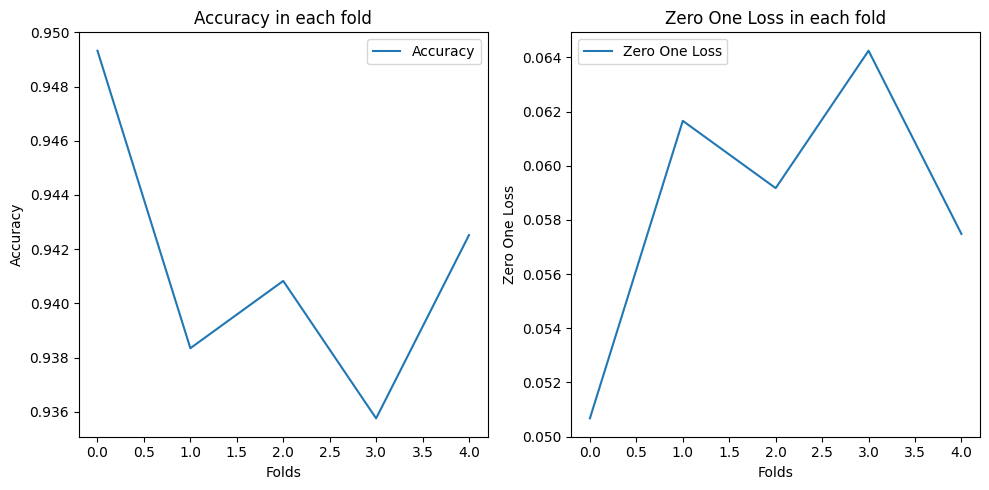

In [ ]:
# Plotting the accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(acc_score, label='Accuracy')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy in each fold')
plt.legend()

# Plotting the zero one loss
plt.subplot(1, 2, 2)
plt.plot(classification_error, label='Zero One Loss')
plt.xlabel('Folds')
plt.ylabel('Zero One Loss')
plt.title('Zero One Loss in each fold')
plt.legend()

plt.tight_layout()
plt.show()

K fold cross validation with My_model_sec_8
I obtained better results with the previous Stratified K-fold, the following was done just for purpose of my curiosity but you are not going to find it in the paper regarding this project.


In [ ]:
#defining model
def My_Second_Cnn_8():
  model_2_8=Sequential()

  #adding convolution layer
  model_2_8.add(Conv2D(96,kernel_size=(3,3),activation='relu',input_shape=(224,224,3), padding='same'))
  model_2_8.add(Conv2D(96,kernel_size=(3,3),activation='relu', padding='same'))
  #adding pooling layer
  model_2_8.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
  #Dropoutlayer
  model_2_8.add(Dropout(0.05))


  ###Second Convolutional Layer
  model_2_8.add(Conv2D(80,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_8.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model_2_8.add(Dropout(0.05))

  ###Third Convolutional Layer
  model_2_8.add(Conv2D(96,kernel_size=(3,3),activation='relu',padding='same'))
  model_2_8.add(MaxPool2D(pool_size=(2,2), padding='same'))

  #adding fully connected layer
  model_2_8.add(Flatten())
  model_2_8.add(Dense(128,activation='relu'))
  model_2_8.add(Dropout(0.15))

  #adding output layer
  model_2_8.add(Dense(1,activation='sigmoid'))

  #compiling the model
  model_2_8.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= 0.001),metrics=['accuracy'])

  return model_2_8

In [ ]:
k = 5
kf = KFold(n_splits=k, random_state=333, shuffle=True)

acc_score_1 = []
loss_score_1 = []
classification_error_1= []

In [ ]:
for train_index , test_index in kf.split(dat):
    X_train = dat[train_index]
    X_test = dat[test_index]

    train_cv = shuffled.loc[shuffled['file_name'].isin(X_train)]
    test_cv = shuffled.loc[shuffled['file_name'].isin(X_test)]

    training_ds= datagenA.flow_from_dataframe(dataframe= train_cv,
                                              directory="/content/df_all.csv",
                                              x_col ='file_name',
                                              y_col='label',
                                              target_size=(224,224),
                                              class_mode='binary',
                                              color_mode='rgb',
                                              shuffle=True,
                                              seed=10)

    test_ds= datagenB.flow_from_dataframe(dataframe= test_cv,
                                                directory="/content/df_all.csv",
                                                x_col ='file_name',
                                                y_col='label',
                                                target_size=(224,224),
                                                class_mode='binary',
                                                color_mode='rgb',
                                                shuffle=False,
                                                seed=10)

    My_model_sec_8_cv=My_Second_Cnn_8()
    early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5,start_from_epoch=40,restore_best_weights=True)
    My_model_sec_8_cv.fit(training_ds, epochs = 60,callbacks=[early_stop])
    #evaluating the results
    print("---------------------------------------------------------------------")
    print("Evaluation of the results....")
    results =  My_model_sec_8_cv.evaluate(test_ds)

    accuracy = results[1]
    acc_score_1.append(accuracy)

    # Calculate classification error (zero one loss)
    error = 1 - results[1]
    classification_error_1.append(error)


Found 4733 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.
Epoch 1/60
148/148 [==============================] - 118s 648ms/step - loss: 0.6048 - accuracy: 0.6786
Epoch 2/60
148/148 [==============================] - 81s 545ms/step - loss: 0.4295 - accuracy: 0.8132
Epoch 3/60
148/148 [==============================] - 81s 544ms/step - loss: 0.3960 - accuracy: 0.8379
Epoch 4/60
148/148 [==============================] - 81s 545ms/step - loss: 0.3759 - accuracy: 0.8394
Epoch 5/60
148/148 [==============================] - 83s 556ms/step - loss: 0.3530 - accuracy: 0.8538
Epoch 6/60
148/148 [==============================] - 80s 540ms/step - loss: 0.3417 - accuracy: 0.8565
Epoch 7/60
148/148 [==============================] - 81s 545ms/step - loss: 0.3090 - accuracy: 0.8718
Epoch 8/60
148/148 [==============================] - 80s 541ms/step - loss: 0.2918 - accuracy: 0.8810
Epoch 9/60
148/148 [==============================] -

In [ ]:
#Accuracy in each fold and average accuracy
avg_acc = np.mean(acc_score)
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc))

accuracy of each fold - [0.8657094836235046, 0.8361486196517944, 0.8850380182266235, 0.8672865629196167, 0.8740490078926086]
Avg accuracy : 0.8656463384628296


In [ ]:
# Print the average accuracy
avg_loss = np.mean(loss)

print('Avg loss : {}'.format(avg_loss))

Loss in each fold - 0.2815541625022888
Avg loss : 0.2815541625022888


In [ ]:
# Zero One-loss in each fold and average zero-one loss
avg_z_loss = np.mean(classification_error)

print('zero one Loss in each fold - {}'.format(classification_error))
print('Avg zero-one loss : {}'.format(avg_z_loss))

zero one Loss in each fold - [0.13429051637649536, 0.16385138034820557, 0.11496198177337646, 0.1327134370803833, 0.12595099210739136]
Avg zero-one loss : 0.1343536615371704
